# Introduction to Linear Regression

*Adapted from [Kevin Markham](https://github.com/justmarkham)'s exellent example. *

*Which was itself adapted from Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*


## Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

Will be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

In [513]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# make sure pandas will show all of our columns in wide data tables
pd.set_option('display.max_columns', 500)

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [514]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [515]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

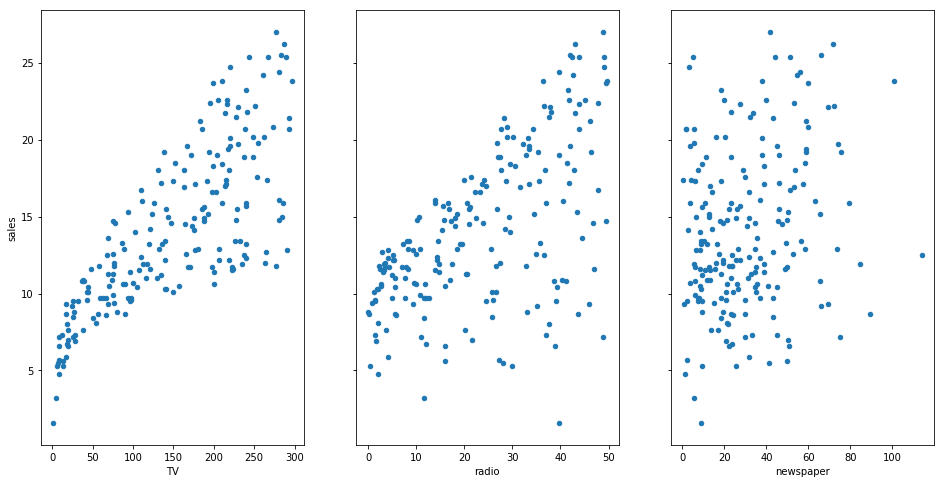

In [516]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

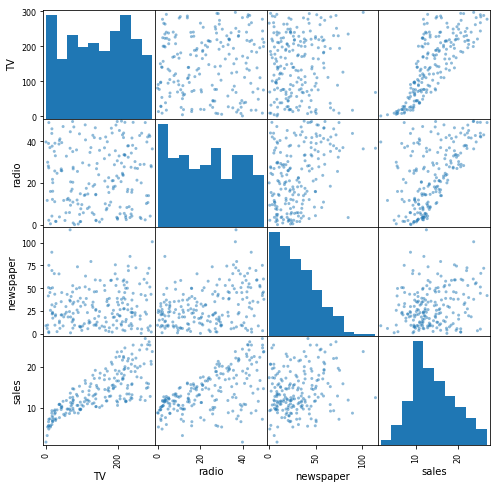

In [517]:
# Visualize the relationships between all measures
_ = pd.plotting.scatter_matrix(data, figsize=(8,8))

In [518]:
# check to see how correlated the variables are
data.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [519]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           1.47e-42
Time:                        16:17:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same thing in **sklearn**.

In [520]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data[['TV']], data[['sales']])
reg.coef_

array([[ 0.04753664]])

In [521]:
reg.intercept_

array([ 7.03259355])

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [522]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [523]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

TV
0  50

In [524]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [525]:
# create a DataFrame with the minimum and maximum values of TV
X_min_max = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_min_max.head()

TV
0    0.7
1  296.4

In [526]:
# make predictions for those x values and store them
preds = lm.predict(X_min_max)
preds

0     7.065869
1    21.122454
dtype: float64

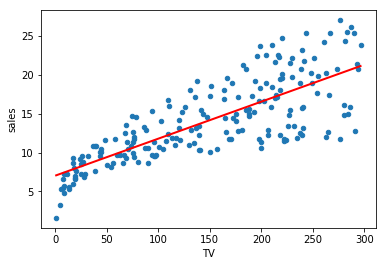

In [527]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_min_max, preds, c='red', linewidth=2)

In [528]:
data[['TV']].head()

TV
1  230.1
2   44.5
3   17.2
4  151.5
5  180.8

Now let's examine the residuals.

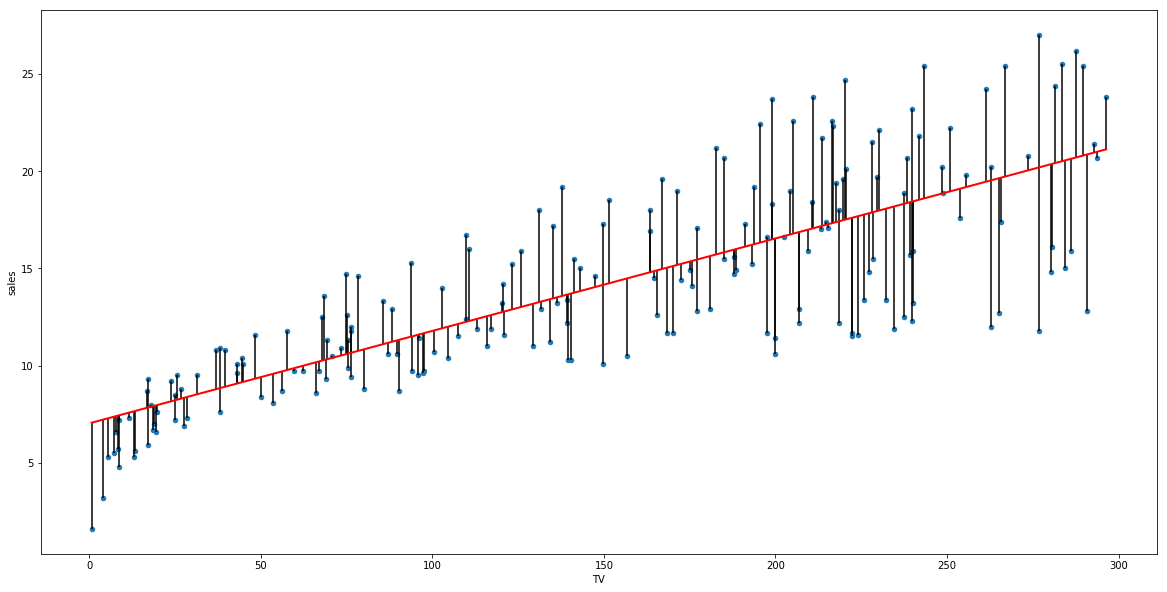

In [529]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales',figsize=[20,10])

# then, plot the least squares line
plt.plot(X_min_max, preds, c='red', linewidth=2)

# plot the predictions
#plt.plot(data[['TV']], lm.predict(data[['TV']]),'x', c="red")

# plot the residuals
plt.vlines(data['TV'],data['sales'],lm.predict(data[['TV']]))

In [530]:
lm.rsquared

0.61187505085007099

## Confidence in our Model

Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [531]:
# print the confidence intervals for the model coefficients
ci = lm.conf_int()
ci

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

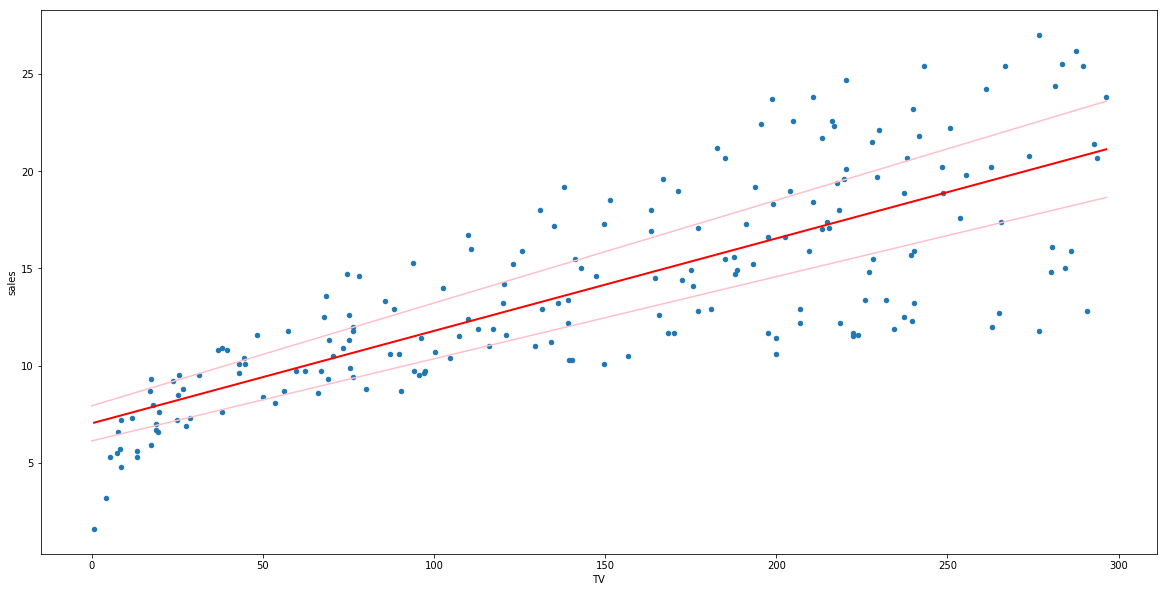

In [532]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales',figsize=[20,10])

# then, plot the least squares line
plt.plot(X_min_max, preds, c='red', linewidth=2)

# then plot the min and max CIs
plt.plot([0, data.TV.max()],
         [ci[0]['Intercept'], ci[0]['Intercept'] + data.TV.max()*ci[0]['TV']], c='pink')
plt.plot([0, data.TV.max()],
         [ci[1]['Intercept'], ci[1]['Intercept'] + data.TV.max()*ci[1]['TV']], c='pink')



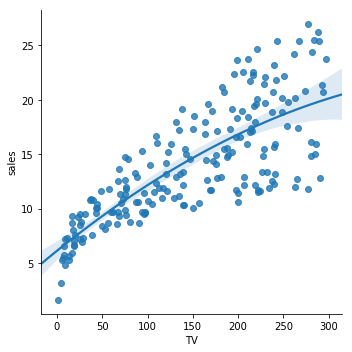

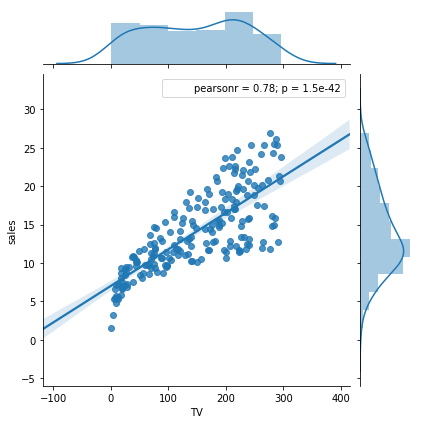

In [533]:
# same thing in Seaborn
import seaborn as sns

sns.lmplot(x='TV', y='sales', data=data, order=2)
sns.jointplot(data.TV, data.sales, kind='reg', order=1)  # try this too!

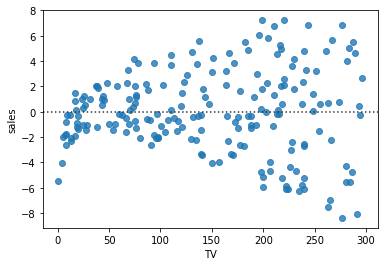

In [534]:
# Hard to get actual values, but can plot the residuals
sns.residplot(x="TV", y="sales", data=data);

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

Let's calculate the R-squared value for our simple linear model:

In [535]:
# print the R-squared value for the model
lm.rsquared

0.61187505085007099

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Fitting a polynomial model

In [536]:
# create a fitted model in one line
pm2 = smf.ols(formula='sales ~ np.power(TV,6) +np.power(TV,5) +np.power(TV,4) +np.power(TV,3) + np.power(TV,2) + TV', data=data).fit()

# print the coefficients
pm2.params

Intercept          4.936237e-02
np.power(TV, 6)   -1.580161e-12
np.power(TV, 5)    1.640608e-09
np.power(TV, 4)   -6.582064e-07
np.power(TV, 3)    1.278956e-04
np.power(TV, 2)   -1.232823e-02
TV                 5.803490e-01
dtype: float64

In [537]:
# print the R-squared value for the model
pm2.rsquared

0.6229281391065371

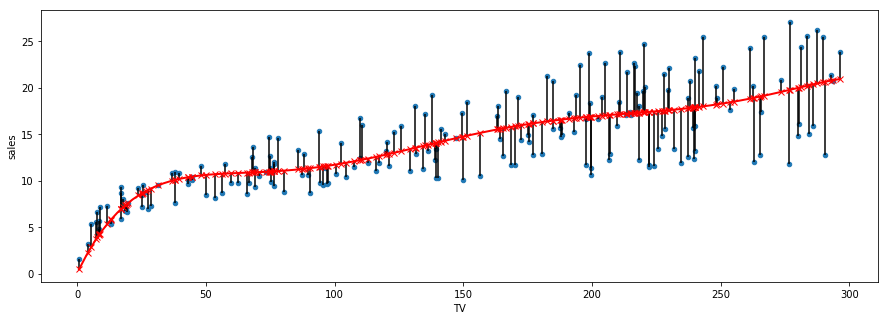

In [538]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales',figsize=[15,5])

# then, plot the least squares line
x_vals = pd.DataFrame({'TV':np.linspace(data.TV.min(), data.TV.max(), 100)})
plt.plot(x_vals,pm2.predict(x_vals), c='red', linewidth=2)

# plot the predictions
plt.plot(data[['TV']], pm2.predict(data[['TV']]),'x', c="red")

# plot the residuals
plt.vlines(data['TV'],data['sales'],pm2.predict(data[['TV']]))

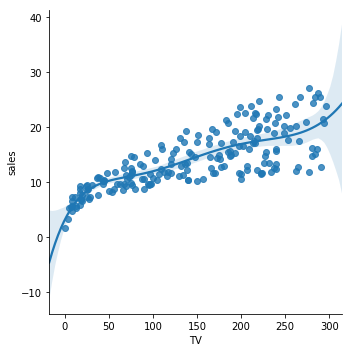

In [539]:
# In Seaborn
sns.lmplot(x='TV', y='sales', data=data, order=6)

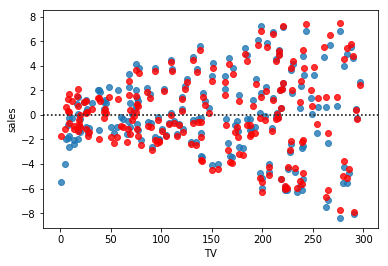

In [540]:
# Hard to get actual values, but can plot the residuals
sns.residplot(x="TV", y="sales", data=data);
sns.residplot(x="TV", y="sales", data=data, order=6, color='red');

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [541]:
# create a fitted model with all three features
mlm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
mlm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [542]:
# print a summary of the fitted model
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           1.58e-96
Time:                        16:17:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we *might* reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [543]:
# only include TV and Radio in the model
mlm2 = smf.ols(formula='sales ~ TV + radio', data=data).fit()
mlm2.rsquared

0.89719426108289557

In [544]:
# add Newspaper to the model (which we believe has no association with Sales)
mlm2 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
mlm2.rsquared

0.89721063817895219

# NBA player performance (Datathon)
Another fun dataset to play with.

In [545]:
nba_data = pd.DataFrame.from_csv("NBA 2015-16 stats.csv")
nba_data.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


Player         Id Position  Age Team  GamesPlayed  GamesStarted  \
Rk                                                                           
1      Quincy Acy    acyqu01       PF   25  SAC           59            29   
2    Jordan Adams  adamsjo01       SG   21  MEM            2             0   
3    Steven Adams  adamsst01        C   22  OKC           80            80   
4   Arron Afflalo  afflaar01       SG   30  NYK           71            57   
5   Alexis Ajinca  ajincal01        C   27  NOP           59            17   

    MinutesPlayed  FieldGoals  FieldGoalAtts  FieldGoalPct  ThreePtrs  \
Rk                                                                      
1             876         119            214         0.556         19   
2              15           2              6         0.333          0   
3            2014         261            426         0.613          0   
4            2371         354            799         0.443         91   
5             861         150            315         0.476          0   

    ThreePtrsAtt  ThreePtrsPct  TwoPtrs  TwoPtrsAtt  TwoPtrsPct   eFG%  \
Rk                                                                       
1             49         0.388      100         165       0.606  0.600   
2              1         0.000        2           5       0.400  0.333   
3              0           NaN      261         426       0.613  0.613   
4            238         0.382      263         561       0.469  0.500   
5              1         0.000      150         314       0.478  0.476   

    FreeThrows  FreeThrowAtt  FreeThrowPct  ReboundsOffense  ReboundsDefense  \
Rk                                                                             
1           50            68         0.735               65              123   
2            3             5         0.600                0                2   
3          114           196         0.582              219              314   
4          110           131         0.840               23              243   
5           52            62         0.839               75              194   

    ReboundsTotal  Assists  Steals  Blocks  TurnoverPct  PersonalFouls  Points  
Rk                                                                              
1             188       27      29      24           27            103     307  
2               2        3       3       0            2              2       7  
3             533       62      42      89           84            223     636  
4             266      144      25      10           82            142     909  
5             269       31      19      36           54            134     352

In [546]:
# cross validation example:
# fit the model using nba1, then check how accurate its predictions are for nba2 later on...
nba1 = data.sample(100)
nba2 = data.sample(100)

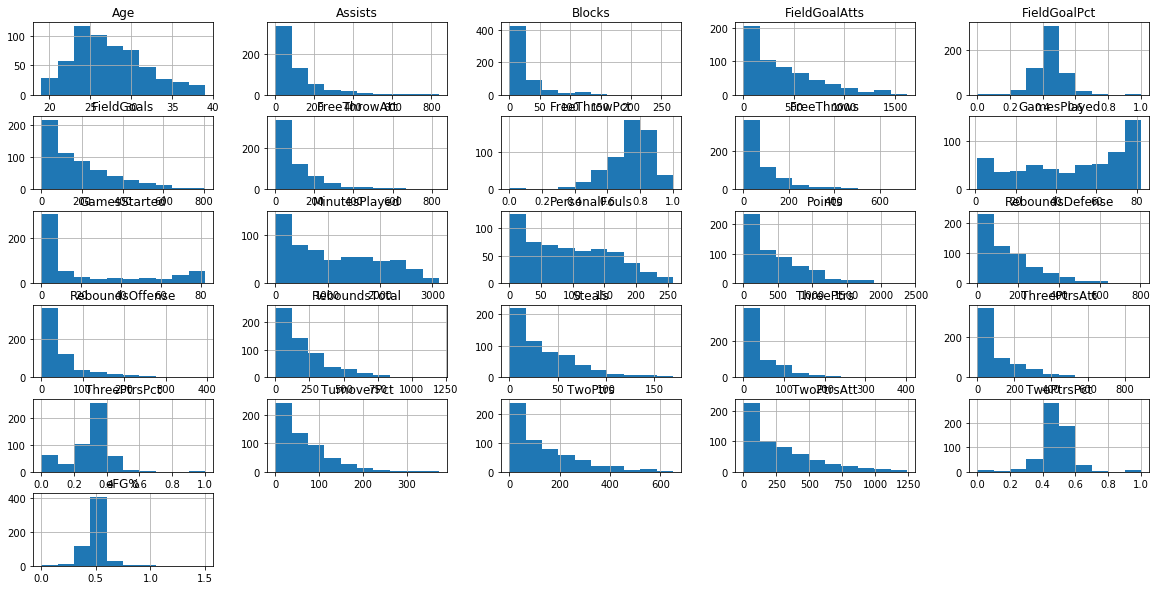

In [547]:
_ = nba_data.hist(figsize=(20,10))

Let's look at just a subset of the stats

In [548]:
nba_data.sort_values(by="Points", ascending=False)[["Player","GamesPlayed","MinutesPlayed","ThreePtrsPct","TwoPtrsPct","FreeThrowPct"]].head(10)

Player  GamesPlayed  MinutesPlayed  ThreePtrsPct  TwoPtrsPct  \
Rk                                                                             
177       James Harden           82           3125         0.359       0.494   
105      Stephen Curry           79           2700         0.454       0.566   
126       Kevin Durant           72           2578         0.387       0.569   
221       LeBron James           76           2709         0.309       0.573   
266     Damian Lillard           75           2676         0.375       0.450   
452  Russell Westbrook           80           2750         0.296       0.503   
153        Paul George           81           2819         0.371       0.447   
115      DeMar DeRozan           78           2804         0.338       0.458   
421      Isaiah Thomas           82           2644         0.359       0.462   
425      Klay Thompson           80           2666         0.425       0.510   

     FreeThrowPct  
Rk                 
177         0.860  
105         0.908  
126         0.898  
221         0.731  
266         0.892  
452         0.812  
153         0.860  
115         0.850  
421         0.871  
425         0.873

Let's model Free Throw % using (Three Point %, Two Point %, Minutes Played, and Games Played)

In [549]:
lm_nba = smf.ols(formula='FreeThrowPct ~ ThreePtrsPct + TwoPtrsPct + MinutesPlayed + GamesPlayed', data=nba_data).fit()

# print the coefficients & r2 value
print(lm_nba.params)
print("R2=" + str(lm_nba.rsquared))
lm_nba.summary()

Intercept        0.709718
ThreePtrsPct     0.116918
TwoPtrsPct      -0.003215
MinutesPlayed    0.000034
GamesPlayed     -0.000617
dtype: float64
R2=0.0431283184668


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FreeThrowPct   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     5.634
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           0.000193
Time:                        16:17:53   Log-Likelihood:                 357.10
No. Observations:                 505   AIC:                            -704.2
Df Residuals:                     500   BIC:                            -683.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7097      0.037     18.976      0.000       0.636       0.783
ThreePtrsPct      0.1169      0.041      2.848      0.005       0.036       0.198
TwoPtrsPct       -0.0032      0.072     -0.045      0.964      -0.145       0.139
MinutesPlayed  3.446e-05    1.3e-05      2.645      0.008    8.86e-06    6.01e-05
GamesPlayed      -0.0006      0.000     -1.364      0.173      -0.002       0.000
==============================================================================
Omnibus:                      122.067   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.149
Skew:                          -1.040   Prob(JB):                    2.01e-105
Kurtosis:                       7.312   Cond. No.                     2.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dummy Variables
Now let's try to model Free Throw Percentage using Three Point %, which worked well last time, and Position.

Because Position is a categorical variable with several possible values (n=5), this is actually equivalent to creating a set of n-1 new binary variables.

In [550]:
# Filter to remove players who played multiple positions
nba_pos_data = nba_data.sort_values(by="Points", ascending=False)[["Player","Position","ThreePtrsPct","FreeThrowPct"]]
nba_pos_data = nba_pos_data[(nba_pos_data["Position"] == "SG") | (nba_pos_data["Position"] == "PG") | (nba_pos_data["Position"] == "SF") | (nba_pos_data["Position"] == "PF") | (nba_pos_data["Position"] == "C")]
nba_pos_data.head()

Player Position  ThreePtrsPct  FreeThrowPct
Rk                                                      
177    James Harden       SG         0.359         0.860
105   Stephen Curry       PG         0.454         0.908
126    Kevin Durant       SF         0.387         0.898
221    LeBron James       SF         0.309         0.731
266  Damian Lillard       PG         0.375         0.892

Now lets fit a model by position:

In [551]:
lm_nba_pos = smf.ols(formula='FreeThrowPct ~ ThreePtrsPct + Position', data=nba_pos_data).fit()

# print the coefficients
print(lm_nba_pos.params)
print("R2=" + str(lm_nba_pos.rsquared))
lm_nba_pos.summary()

Intercept         0.694601
Position[T.PF]   -0.005357
Position[T.PG]    0.059126
Position[T.SF]    0.033505
Position[T.SG]    0.049104
ThreePtrsPct      0.091312
dtype: float64
R2=0.0658007689409


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FreeThrowPct   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     7.029
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           2.31e-06
Time:                        16:17:53   Log-Likelihood:                 363.01
No. Observations:                 505   AIC:                            -714.0
Df Residuals:                     499   BIC:                            -688.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6946      0.016     43.462      0.000       0.663       0.726
Position[T.PF]    -0.0054      0.019     -0.277      0.782      -0.043       0.033
Position[T.PG]     0.0591      0.019      3.129      0.002       0.022       0.096
Position[T.SF]     0.0335      0.020      1.687      0.092      -0.006       0.073
Position[T.SG]     0.0491      0.020      2.512      0.012       0.011       0.088
ThreePtrsPct       0.0913      0.042      2.199      0.028       0.010       0.173
==============================================================================
Omnibus:                      120.780   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.435
Skew:                          -1.071   Prob(JB):                     5.06e-92
Kurtosis:                       6.923   Cond. No.                         9.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Datathon Questions

## Question 1
Which two player statistics appear to be the most postively correlated with one another? Which two are most negatively correlated?

What if you only consider players who played more than 1000 minutes?

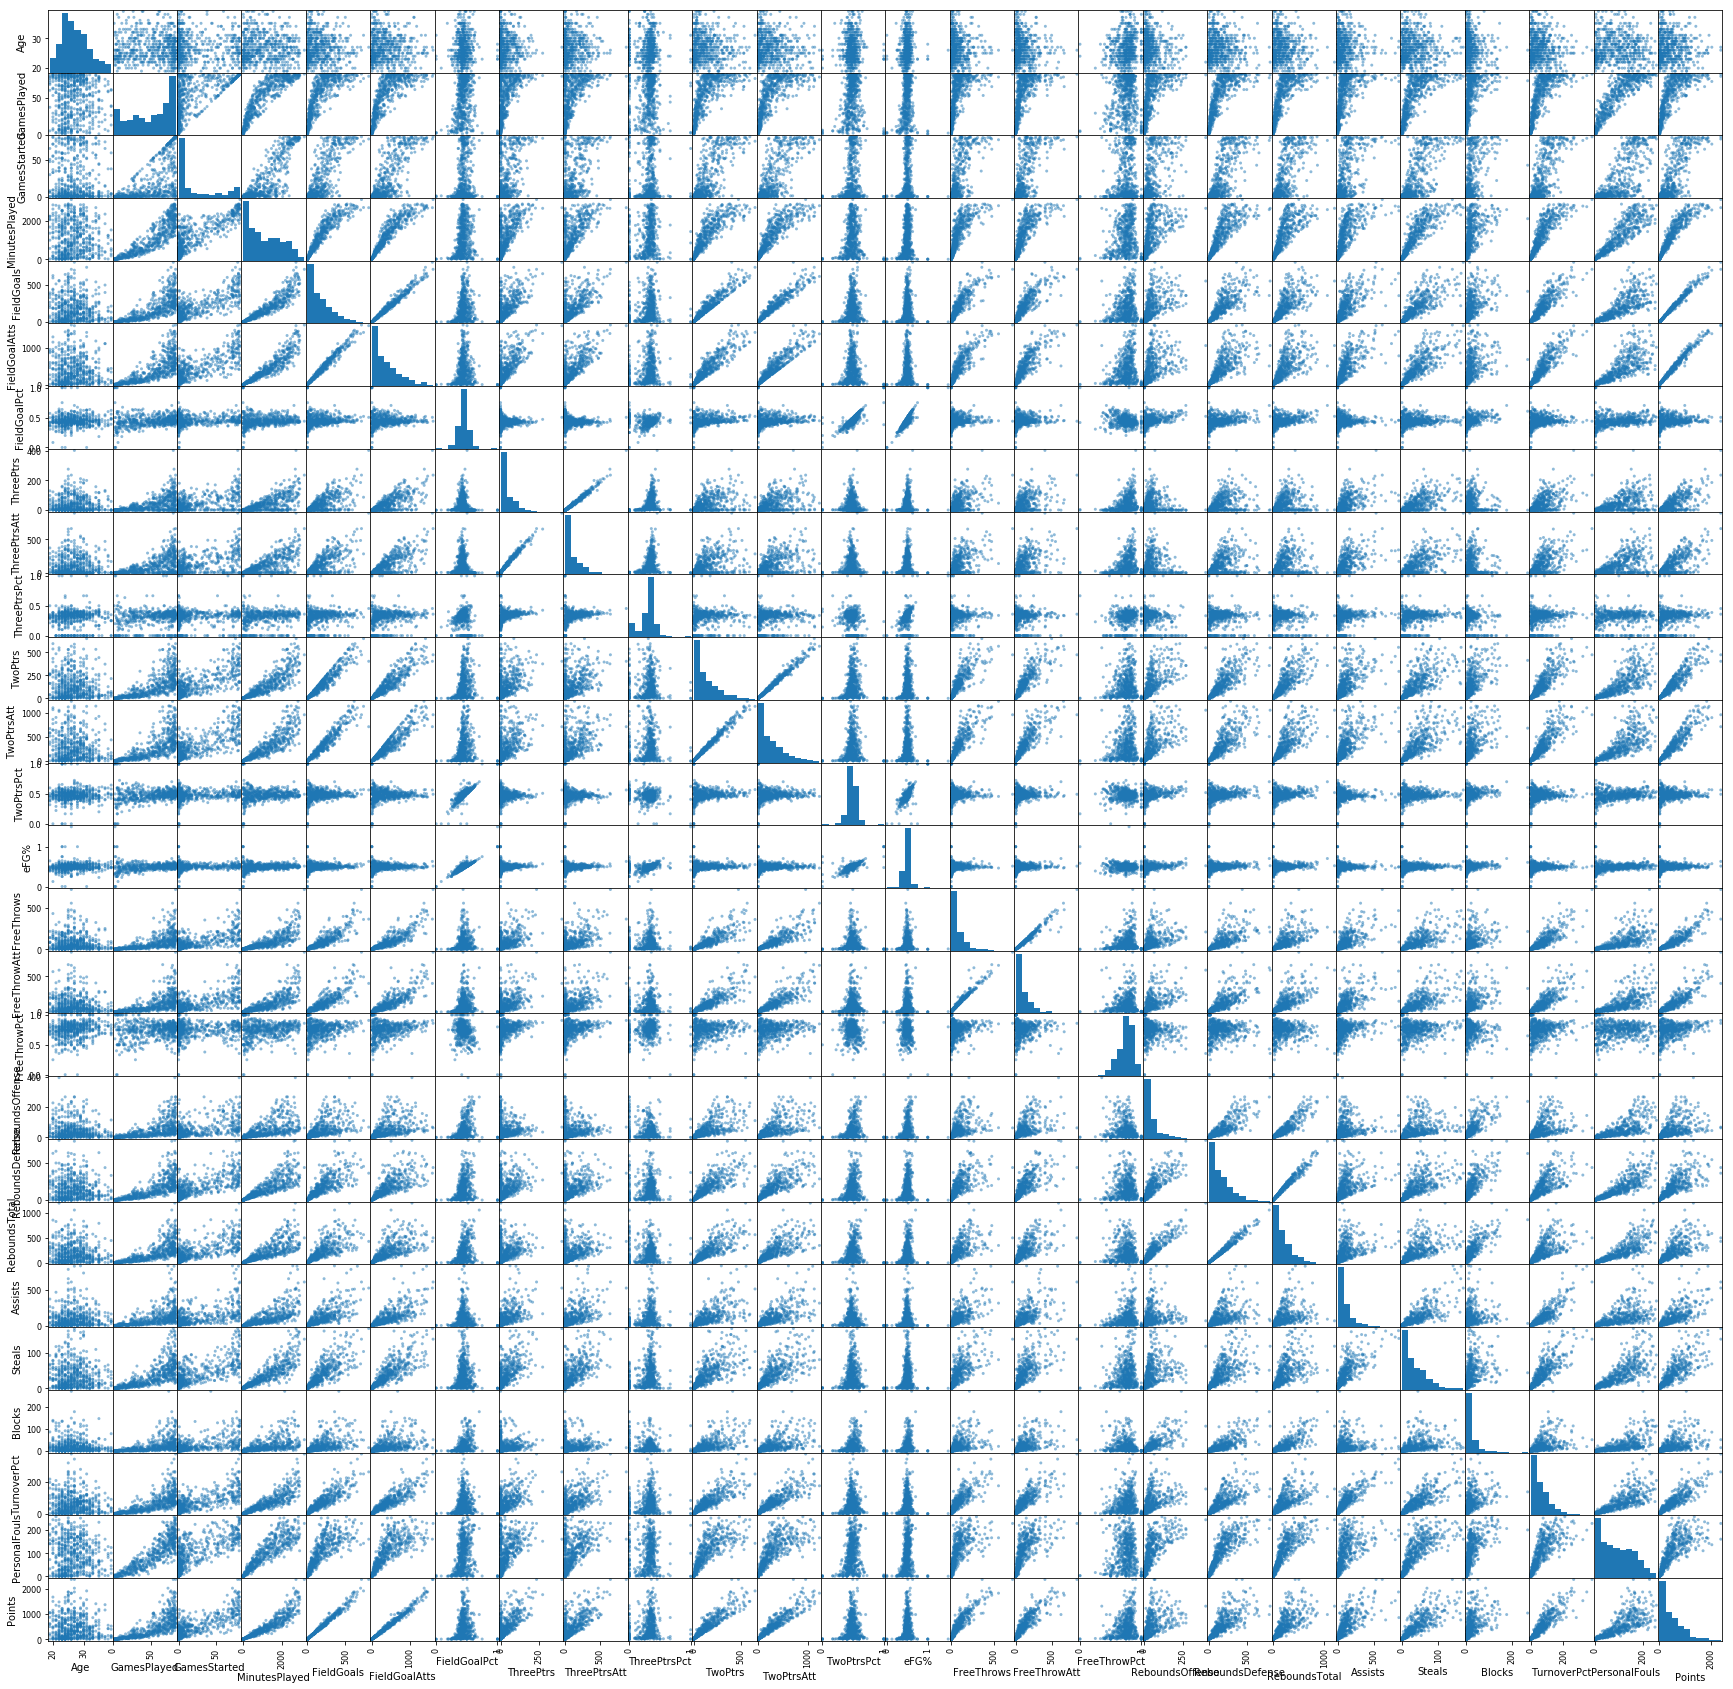

In [552]:
player_stats = nba_data.drop(['Player','Id'], axis=1)
_ = pd.plotting.scatter_matrix(player_stats, figsize=(30,30))

In [553]:
player_stats.corr()    

Age  GamesPlayed  GamesStarted  MinutesPlayed  \
Age              1.000000     0.002459      0.001705      -0.017854   
GamesPlayed      0.002459     1.000000      0.624082       0.881586   
GamesStarted     0.001705     0.624082      1.000000       0.833720   
MinutesPlayed   -0.017854     0.881586      0.833720       1.000000   
FieldGoals      -0.045186     0.756827      0.810618       0.927515   
FieldGoalAtts   -0.042209     0.760038      0.798929       0.931199   
FieldGoalPct     0.037404     0.142414      0.150420       0.133667   
ThreePtrs        0.026383     0.552673      0.533645       0.680672   
ThreePtrsAtt     0.020260     0.578954      0.545049       0.704962   
ThreePtrsPct     0.010395     0.135012      0.094567       0.161727   
TwoPtrs         -0.064786     0.708854      0.781295       0.867454   
TwoPtrsAtt      -0.065944     0.714062      0.782465       0.877062   
TwoPtrsPct       0.039814     0.146627      0.119816       0.124057   
eFG%             0.074710     0.158599      0.140107       0.155329   
FreeThrows      -0.049120     0.602047      0.700178       0.788836   
FreeThrowAtt    -0.068969     0.617419      0.713793       0.795995   
FreeThrowPct     0.164617     0.142448      0.103551       0.185367   
ReboundsOffense -0.079442     0.582690      0.573771       0.599959   
ReboundsDefense -0.037548     0.740509      0.752055       0.832770   
ReboundsTotal   -0.051100     0.719279      0.725216       0.792674   
Assists          0.036455     0.561103      0.617034       0.721392   
Steals          -0.029483     0.726782      0.738134       0.865427   
Blocks          -0.063403     0.507677      0.543825       0.548467   
TurnoverPct     -0.049066     0.712587      0.754235       0.868590   
PersonalFouls   -0.036989     0.879832      0.742231       0.901475   
Points          -0.040421     0.742702      0.800717       0.921506   

                 FieldGoals  FieldGoalAtts  FieldGoalPct  ThreePtrs  \
Age               -0.045186      -0.042209      0.037404   0.026383   
GamesPlayed        0.756827       0.760038      0.142414   0.552673   
GamesStarted       0.810618       0.798929      0.150420   0.533645   
MinutesPlayed      0.927515       0.931199      0.133667   0.680672   
FieldGoals         1.000000       0.988398      0.160719   0.669274   
FieldGoalAtts      0.988398       1.000000      0.088334   0.730869   
FieldGoalPct       0.160719       0.088334      1.000000  -0.099795   
ThreePtrs          0.669274       0.730869     -0.099795   1.000000   
ThreePtrsAtt       0.682642       0.752895     -0.124860   0.990015   
ThreePtrsPct       0.146244       0.176352      0.074173   0.363804   
TwoPtrs            0.959681       0.922308      0.232659   0.433435   
TwoPtrsAtt         0.963850       0.943946      0.179385   0.469340   
TwoPtrsPct         0.133492       0.075575      0.826178  -0.033681   
eFG%               0.157099       0.111282      0.901036   0.102863   
FreeThrows         0.876145       0.875146      0.119316   0.561653   
FreeThrowAtt       0.868759       0.854162      0.163428   0.492809   
FreeThrowPct       0.208690       0.246310     -0.241525   0.322334   
ReboundsOffense    0.575174       0.497593      0.339219   0.024634   
ReboundsDefense    0.807416       0.763024      0.249701   0.374489   
ReboundsTotal      0.766630       0.711006      0.284453   0.284582   
Assists            0.731153       0.758470      0.011835   0.579131   
Steals             0.812763       0.827835      0.069224   0.653735   
Blocks             0.539218       0.467012      0.310699   0.066312   
TurnoverPct        0.898024       0.905825      0.098564   0.606932   
PersonalFouls      0.802296       0.790233      0.194384   0.506247   
Points             0.991681       0.990015      0.131230   0.721100   

                 ThreePtrsAtt  ThreePtrsPct   TwoPtrs  TwoPtrsAtt  TwoPtrsPct  \
Age                  0.020260      0.010395 -0.064786   -0.065944    0.039814   
GamesPlayed          0.5

In [554]:
player_stats_corr = player_stats.corr().unstack().sort_values(ascending=False)
player_stats_corr = player_stats_corr[player_stats_corr != 1.0]

In [555]:
player_stats_corr.head(5)

Points      FieldGoals      0.991681
FieldGoals  Points          0.991681
TwoPtrs     TwoPtrsAtt      0.991472
TwoPtrsAtt  TwoPtrs         0.991472
ThreePtrs   ThreePtrsAtt    0.990015
dtype: float64

In [556]:
player_stats_corr.tail(5)

ThreePtrsPct  ReboundsOffense   -0.177756
              TwoPtrsPct        -0.186193
TwoPtrsPct    ThreePtrsPct      -0.186193
FreeThrowPct  FieldGoalPct      -0.241525
FieldGoalPct  FreeThrowPct      -0.241525
dtype: float64

Most Positively Correlated:
- Points & FieldGoals
- TwoPtrs & TwoPtrsAtt
- ThreePtrs & ThreePtrsAtt

Most Negatively Correlated:
- ThreePtrsPct & ReboundsOffense
- TwoPtrsPct & ThreePtrsPct
- FreeThrowPct & FieldGoalPct

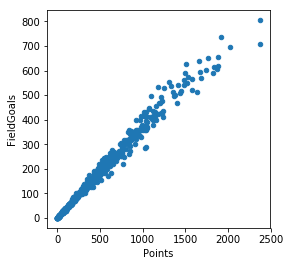

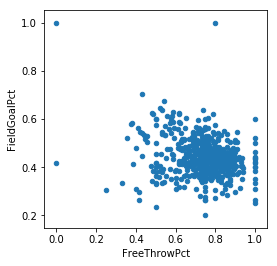

In [557]:
player_stats.plot.scatter(x='Points', y='FieldGoals', figsize=(4,4))

player_stats.plot.scatter(x='FreeThrowPct', y='FieldGoalPct', figsize=(4,4))

In [558]:
top_player_stats = nba_data.drop(['Player','Id'], axis=1)
top_stats_corr = top_player_stats.loc[top_player_stats['MinutesPlayed'] > 1000].corr()
top_player_stats = top_stats_corr.copy()
top_stats_corr = top_stats_corr.corr().unstack().sort_values(ascending=False)
top_stats_corr = top_stats_corr[top_stats_corr != 1.0]

In [559]:
top_stats_corr.head(5)

ThreePtrs        ThreePtrsAtt     0.998023
ThreePtrsAtt     ThreePtrs        0.998023
FieldGoalAtts    Points           0.990656
Points           FieldGoalAtts    0.990656
ReboundsDefense  ReboundsTotal    0.990151
dtype: float64

In [560]:
top_stats_corr.tail(5)

FieldGoalPct  ThreePtrsAtt   -0.897275
TwoPtrsPct    FreeThrowPct   -0.909808
FreeThrowPct  TwoPtrsPct     -0.909808
FieldGoalPct  FreeThrowPct   -0.912086
FreeThrowPct  FieldGoalPct   -0.912086
dtype: float64

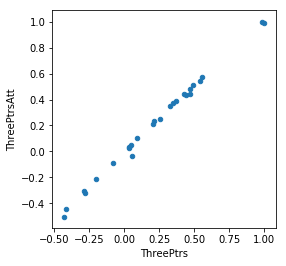

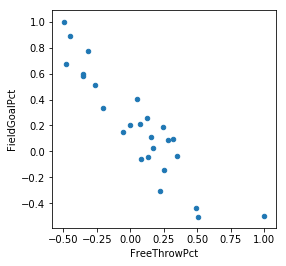

In [561]:
top_player_stats.plot.scatter(x='ThreePtrs', y='ThreePtrsAtt', figsize=(4,4))

top_player_stats.plot.scatter(x='FreeThrowPct', y='FieldGoalPct', figsize=(4,4))

## Players with MinutesPlayed > 1000:

New most positively correlated pair: ReboundsDefense & ReboundsTotal, other top two were the same.

Most negatively correlated two different pairs:
- FreeThrowPct & TwoPtrsPct
- FieldGoalPct & ThreePtrsAtt

## Question 2
Is there a relationship between Field Goal Percentage and Free Throw Percentage? 

Does it change based on a player's position?

In [562]:
data_q2 = nba_data.dropna(how='any')

lm_nba_q2 = smf.ols(formula='FieldGoalPct ~ FreeThrowPct', data=data_q2).fit()

# print the coefficients
print(lm_nba_q2.params)
print("R2=" + str(lm_nba_q2.rsquared))
lm_nba_q2.summary()

Intercept       0.487959
FreeThrowPct   -0.072001
dtype: float64
R2=0.0176015103012


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FieldGoalPct   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.012
Date:                Mon, 12 Feb 2018   Prob (F-statistic):            0.00282
Time:                        16:18:34   Log-Likelihood:                 659.11
No. Observations:                 505   AIC:                            -1314.
Df Residuals:                     503   BIC:                            -1306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4880      0.018     26.705      0.000       0.452       0.524
FreeThrowPct    -0.0720      0.024     -3.002      0.003      -0.119      -0.025
==============================================================================
Omnibus:                       11.578   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.944
Skew:                          -0.052   Prob(JB):                     2.83e-05
Kurtosis:                       3.992   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [563]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data_q2[['FreeThrowPct']], data_q2[['FieldGoalPct']])
reg.score(data_q2[['FreeThrowPct']], data_q2.FieldGoalPct)

0.01760151030124768

In [564]:
# create a DataFrame with the minimum and maximum values of FreeThrowPct:
X_min_max = pd.DataFrame({'FreeThrowPct': [data_q2.FreeThrowPct.min(), data_q2.FreeThrowPct.max()]})
X_min_max

FreeThrowPct
0           0.0
1           1.0

In [565]:
# make predictions for those x values and store them
preds = lm_nba_q2.predict(X_min_max)
preds

0    0.487959
1    0.415958
dtype: float64

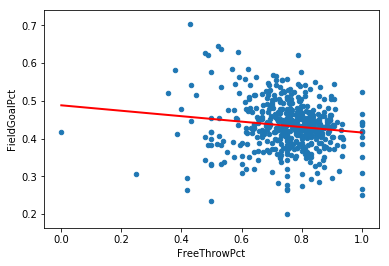

In [566]:
data_q2.plot(kind='scatter', x='FreeThrowPct', y='FieldGoalPct')
plt.plot(X_min_max, preds, c='red', linewidth=2)

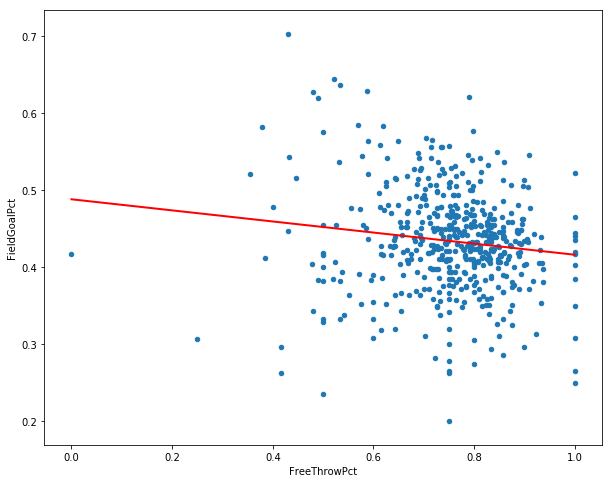

In [567]:
data_q2.plot.scatter(x='FreeThrowPct', y='FieldGoalPct', figsize=(10,8))
plt.plot(X_min_max, preds, c='red', linewidth=2)

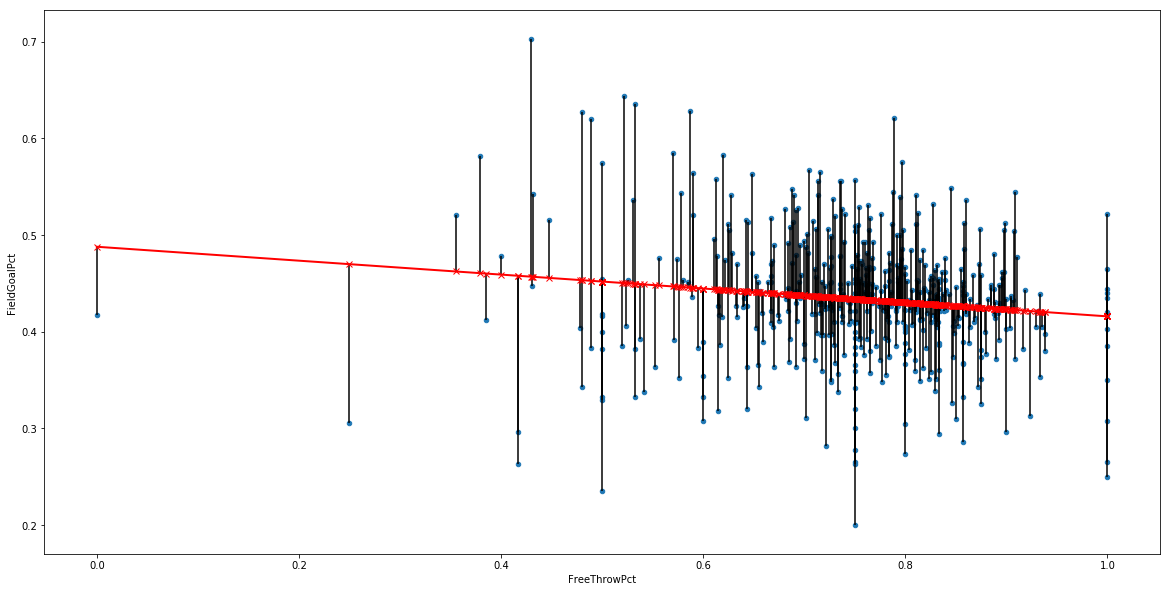

In [568]:
# first, plot the observed data
data_q2.plot(kind='scatter', x='FreeThrowPct', y='FieldGoalPct',figsize=[20,10])

#data_q2[data_q2.index.duplicated()]

# then, plot the least squares line
plt.plot(X_min_max, preds, c='red', linewidth=2)

# plot the predictions
plt.plot(data_q2[['FreeThrowPct']], lm_nba_q2.predict(data_q2[['FreeThrowPct']]),'x', c="red")

# plot the residuals
plt.vlines(data_q2['FreeThrowPct'], data_q2['FieldGoalPct'], lm_nba_q2.predict(data_q2[['FreeThrowPct']]))

## Yes, there is a weak negative correlation, but the r^2 value of a model that attempts to predict Field Goal Percentage using Free Throw Percentage is very small (0.018).

In [569]:
lm_nba_q2b = smf.ols(formula='FieldGoalPct ~ FreeThrowPct + Position', data=data_q2).fit()
lm_nba_q2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FieldGoalPct   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     22.45
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           1.96e-26
Time:                        16:18:35   Log-Likelihood:                 723.99
No. Observations:                 505   AIC:                            -1432.
Df Residuals:                     497   BIC:                            -1398.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5165      0.017     30.178      0.000       0.483       0.550
Position[T.PF]       -0.0523      0.009     -5.717      0.000      -0.070      -0.034
Position[T.PF-C]     -0.0632      0.059     -1.076      0.282      -0.178       0.052
Position[T.PG]       -0.0889      0.009     -9.936      0.000      -0.106      -0.071
Position[T.SF]       -0.0738      0.009     -8.008      0.000      -0.092      -0.056
Position[T.SG]       -0.0999      0.009    -11.074      0.000      -0.118      -0.082
Position[T.SG-SF]    -0.1250      0.059     -2.129      0.034      -0.240      -0.010
FreeThrowPct         -0.0180      0.022     -0.818      0.414      -0.061       0.025
==============================================================================
Omnibus:                       17.047   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.984
Skew:                          -0.253   Prob(JB):                     1.38e-06
Kurtosis:                       4.013   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## If you consider Position as well as Free Throw Percentage, the relationship becomes more meaningful.

If you are a Power Forward, Point Guard, Small Forward, or a Shooting Guard, then your Free Throw Percentage will have a larger negative impact on your Field Goal Percentage.


## Question 3

Build a multiple linear regression model to predict a player's total points per minute played (PPM). 

In your best model, which variables are the strongest predictors?

Try using your model to predict Raptors' Guards DeMar DeRozen and Kyle Lowry's PPM for the following season (2016-2017) based on their other stats from that year (in the file below). How close are you able to get to their actual PPMs? 
<ul><li>DeRozen: 2020 Points / 2620 Minutes = 0.77099
<li>Lowry: 1344 Points / 2244 Minutes = 0.59893</ul>


*[+1 bonus to the team who builds the model that gives the best prediction.]*

In [570]:
data_q3 = pd.DataFrame.from_csv("NBA 2015-16 stats.csv")

nba_drz = pd.DataFrame.from_csv("NBA DeRozan-Lowry 2016-17.csv")
nba_drz

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


Player         Id Position  Age Team  GamesPlayed  GamesStarted  \
Rk                                                                            
404  DeMar DeRozan  derozde01       SG   27  TOR           74            74   
274     Kyle Lowry  lowryky01       PG   30  TOR           60            60   

     MinutesPlayed  FieldGoals  FieldGoalAtts  FieldGoalPct  ThreePtrs  \
Rk                                                                       
404           2620         721           1545         0.467         33   
274           2244         426            918         0.464        193   

     ThreePtrsAtt  ThreePtrsPct  TwoPtrs  TwoPtrsAtt  TwoPtrsPct   eFG%  \
Rk                                                                        
404           124         0.266      688        1421       0.484  0.477   
274           468         0.412      233         450       0.518  0.569   

     FreeThrows  FreeThrowAtt  FreeThrowPct  ReboundsOffense  ReboundsDefense  \
Rk                                                                              
404         545           647         0.842               70              316   
274         299           365         0.819               48              238   

     ReboundsTotal  Assists  Steals  Blocks  TurnoverPct  PersonalFouls  
Rk                                                                       
404            386      290      78      13          180            134  
274            286      417      88      19          173            170

In [571]:
data_q3['PPM'] = data_q3['Points'] / data_q3['MinutesPlayed']
data_q3.sample(3)

Player         Id Position  Age Team  GamesPlayed  GamesStarted  \
Rk                                                                              
418  Mirza Teletovic  teletmi01       PF   30  PHO           79             1   
281     Kevin Martin  martike02       SG   32  MIN           39            12   
331      Steve Novak  novakst01       PF   32  TOT           10             0   

     MinutesPlayed  FieldGoals  FieldGoalAtts  FieldGoalPct  ThreePtrs  \
Rk                                                                       
418           1686         332            777         0.427        181   
281            834         126            334         0.377         38   
331             44           8             18         0.444          7   

     ThreePtrsAtt  ThreePtrsPct  TwoPtrs  TwoPtrsAtt  TwoPtrsPct   eFG%  \
Rk                                                                        
418           460         0.393      151         317       0.476  0.544   
281           103         0.369       88         231       0.381  0.434   
331            15         0.467        1           3       0.333  0.639   

     FreeThrows  FreeThrowAtt  FreeThrowPct  ReboundsOffense  ReboundsDefense  \
Rk                                                                              
418         120           155         0.774               55              247   
281         125           142         0.880               10               71   
331           1             1         1.000                0                5   

     ReboundsTotal  Assists  Steals  Blocks  TurnoverPct  PersonalFouls  \
Rk                                                                        
418            302       89      32      21           84            159   
281             81       46      17       1           41             68   
331              5        0       0       0            1              3   

     Points       PPM  
Rk                     
418     965  0.572361  
281     415  0.497602  
331      24  0.545455

In [572]:
corr_q3 = data_q3.drop(['Player','Id'], axis=1)
ppm = corr_q3.corr().loc[['PPM']].unstack().sort_values(ascending=False)
ppm.head(10)

PPM            PPM    1.000000
Points         PPM    0.562245
FreeThrows     PPM    0.555506
FieldGoals     PPM    0.550670
FieldGoalAtts  PPM    0.541049
TwoPtrsAtt     PPM    0.530591
TwoPtrs        PPM    0.526740
FreeThrowAtt   PPM    0.526350
eFG%           PPM    0.492408
TurnoverPct    PPM    0.452239
dtype: float64

## Strongest predictors ^^^

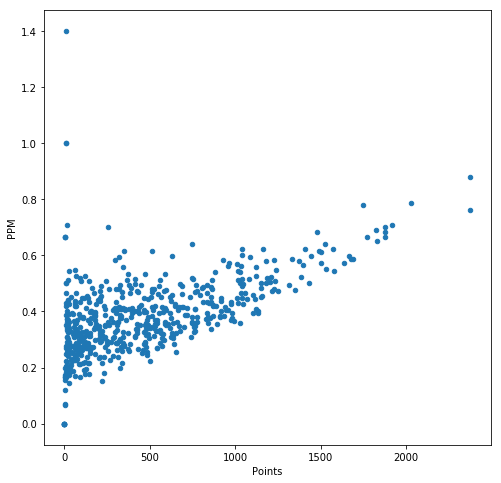

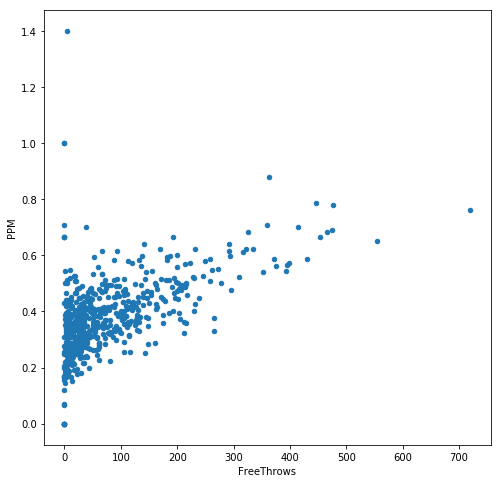

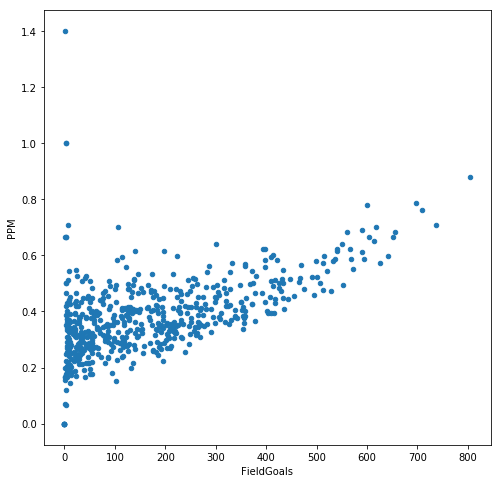

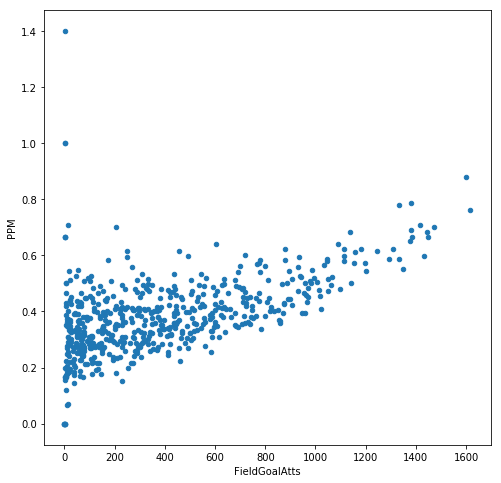

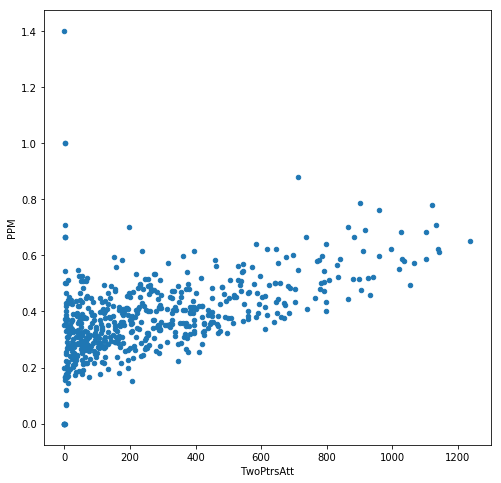

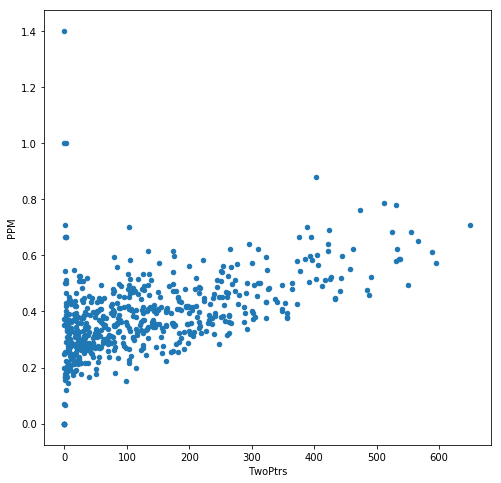

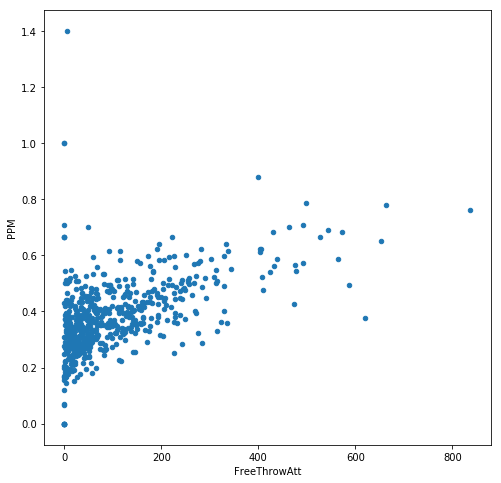

In [573]:
data_q3.plot.scatter(x='Points', y='PPM', figsize=(8,8))
data_q3.plot.scatter(x='FreeThrows', y='PPM', figsize=(8,8))
data_q3.plot.scatter(x='FieldGoals', y='PPM', figsize=(8,8))
data_q3.plot.scatter(x='FieldGoalAtts', y='PPM', figsize=(8,8))
data_q3.plot.scatter(x='TwoPtrsAtt', y='PPM', figsize=(8,8))
data_q3.plot.scatter(x='TwoPtrs', y='PPM', figsize=(8,8))
data_q3.plot.scatter(x='FreeThrowAtt', y='PPM', figsize=(8,8))

In [574]:
mlr_ppm = smf.ols(formula='PPM ~ Points', data=data_q3).fit()
mlr_ppm.rsquared

0.3161196387541525

In [575]:
mlr_ppm = smf.ols(formula='PPM ~ Points + FreeThrows', data=data_q3).fit()
mlr_ppm.rsquared

0.32633888327892369

In [576]:
mlr_ppm = smf.ols(formula='PPM ~ Points + FieldGoals', data=data_q3).fit()
mlr_ppm.rsquared

0.31899205441008638

In [577]:
mlr_ppm = smf.ols(formula='PPM ~ Points + FieldGoalAtts', data=data_q3).fit()
mlr_ppm.rsquared

0.32833726435382538

In [578]:
mlr_ppm = smf.ols(formula='PPM ~ Points + TwoPtrsAtt', data=data_q3).fit()
mlr_ppm.rsquared

0.31616063726370014

In [579]:
mlr_ppm = smf.ols(formula='PPM ~ Points + TwoPtrs', data=data_q3).fit()
mlr_ppm.rsquared

0.31622991093510699

In [580]:
mlr_ppm = smf.ols(formula='PPM ~ Points + FreeThrowAtt', data=data_q3).fit()
mlr_ppm.rsquared

0.31849991191958127

In [581]:
mlr_ppm = smf.ols(formula='PPM ~ Points + FreeThrows + FieldGoals + FieldGoalAtts + TwoPtrsAtt + TwoPtrs + FreeThrowAtt', data=data_q3).fit()
mlr_ppm.rsquared

0.35161139726528434

In [582]:
mlr_ppm = smf.ols(formula='PPM ~ np.power(Points,4) + np.power(Points,3) + np.power(Points,2) + Points + FreeThrows + np.power(FieldGoals,2) + FieldGoals + TwoPtrsAtt + TwoPtrs + np.power(FreeThrowAtt,2) + FreeThrowAtt', data=data_q3).fit()
mlr_ppm.rsquared

0.34621272834956152

In [593]:
mlr_ppm = smf.ols(formula='PPM ~ np.power(Points,4) + np.power(Points,3) + np.power(Points,2) + Points + FreeThrows + np.power(FieldGoals,2) + FieldGoals + FieldGoalAtts + TwoPtrsAtt + TwoPtrs + np.power(FreeThrowAtt,2) + FreeThrowAtt', data=data_q3).fit()
mlr_ppm.rsquared
mlr_ppm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPM   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     28.49
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           1.47e-47
Time:                        16:22:56   Log-Likelihood:                 455.12
No. Observations:                 578   AIC:                            -886.2
Df Residuals:                     566   BIC:                            -833.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.3148      0.011     28.679      0.000       0.293       0.336
np.power(Points, 4)       -2.103e-14   4.12e-14     -0.510      0.610   -1.02e-13    5.99e-14
np.power(Points, 3)        1.206e-10   1.68e-10      0.719      0.472   -2.09e-10     4.5e-10
np.power(Points, 2)       -3.586e-07   2.54e-07     -1.409      0.159   -8.58e-07    1.41e-07
Points                        0.0010      0.000      3.352      0.001       0.000       0.002
FreeThrows                    0.0007      0.000      1.568      0.117      -0.000       0.002
np.power(FieldGoals, 2)    1.405e-06   8.81e-07      1.595      0.111   -3.25e-07    3.14e-06
FieldGoals                   -0.0004      0.000     -2.512      0.012      -0.001   -8.33e-05
FieldGoalAtts                -0.0009      0.000     -2.992      0.003      -0.001      -0.000
TwoPtrsAtt                    0.0008      0.000      2.391      0.017       0.000       0.002
TwoPtrs                      -0.0015      0.001     -2.262      0.024      -0.003      -0.000
np.power(FreeThrowAtt, 2)  4.781e-08    3.4e-07      0.141      0.888   -6.19e-07    7.15e-07
FreeThrowAtt                 -0.0007      0.000     -1.936      0.053      -0.001    9.54e-06
==============================================================================
Omnibus:                      396.005   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10969.127
Skew:                           2.593   Prob(JB):                         0.00
Kurtosis:                      23.702   Cond. No.                     4.99e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [584]:
mlr_ppm = smf.ols(formula='PPM ~ np.power(Points,4) + np.power(Points,3) + np.power(Points,2) + Points + FreeThrows + np.power(FieldGoals,2) + FieldGoals + FieldGoalAtts + TwoPtrsAtt + TwoPtrs + np.power(FreeThrowAtt,2) + FreeThrowAtt + TurnoverPct', data=data_q3).fit()
mlr_ppm.rsquared

0.37094945827741743

In [585]:
derozen_data = data_q3.loc[nba_data['Id'] == 'derozde01']
derozen_data = derozen_data[['Points','FreeThrows','FieldGoals','FieldGoalAtts','TwoPtrsAtt','TwoPtrs','FreeThrowAtt']]

lowry_data = data_q3.loc[nba_data['Id'] == 'lowryky01']
lowry_data = lowry_data[['Points','FreeThrows','FieldGoals','FieldGoalAtts','TwoPtrsAtt','TwoPtrs','FreeThrowAtt']]

In [586]:
derozen_real = 0.77099
lowry_real = 0.59893

In [590]:
derozen_err = abs(derozen_real - mlr_ppm.predict(derozen_data).iloc[0].round(5))
lowry_err = abs(lowry_real - mlr_ppm.predict(lowry_data).iloc[0].round(5))
print(mlr_ppm.predict(derozen_data).iloc[0])
print(mlr_ppm.predict(lowry_data).iloc[0],'\n')

print(derozen_err)
print(lowry_err)
print('Total Error:',derozen_err + lowry_err)

0.757952807562
0.596463677188 

0.01304
0.00247
Total Error: 0.01551


## Question 4
{Your choice.}

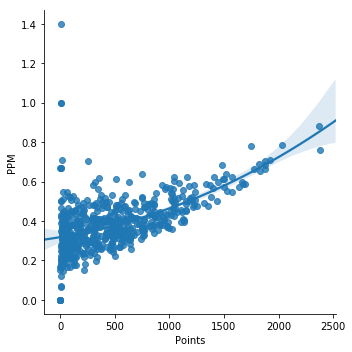

In [599]:
#sns.lmplot(x='Points', y='PPM', data=data_q3, order=1)
#sns.lmplot(x='Points', y='PPM', data=data_q3, order=2)
sns.lmplot(x='Points', y='PPM', data=data_q3, order=3)

## Question 5
{Your choice.}